In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def contraction(delta,p):
    return np.exp(delta*p)/(1+np.exp(delta*p))

def contraction_map(delta,p):
    """final result is beliefs of firm1/firm2"""
    for i in range(20):
        #print('b1: %.4f, p2: %.4f'%tuple(p))
        p = contraction(delta,p)
        p = np.flip(p)
    return p
        #print('p1: %.4f, p2: %.4f'%tuple(p))
        #print('----- end of iteration %s ----'%i)
    
pr = np.array([1, 0])
params =  np.array([-2, -3])
result = contraction_map(params,pr)
print(result) #

[0.2414617  0.38156182]


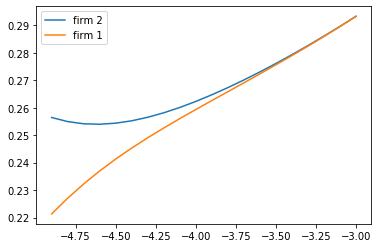

In [37]:
results = []
for params_incr in np.arange(0,2,.1):
    params_this_iter = params 
    params_this_iter = params[1] - params_incr
    pr = np.array([1, 0])
    result = contraction_map(params_this_iter,pr)
    results.append(result)
    
results = np.array(results)
    
plt.plot(params[1] - np.arange(0,2,.1), results[:,0],label='firm 2' )
plt.plot(params[1] - np.arange(0,2,.1), results[:,1],label='firm 1' )
plt.legend()

In [39]:
#actually caclualte an equilibrium in this game
u = np.random.logistic(size=(1000,2))
y = ( (params*result + u) >=0 ).astype(int)
print(y.sum(axis=0)/1000)

[0.365 0.318]
